Según mi hipoótesis, $\lambda_2$ debería maximizarse cuando $R(\Gamma)$ se minimice para cierta elección de pesos $c_1,\ldots,c_m$ tales que $c_1+\cdots+c_m=m$. Para el camino $P_{m+1}$ sabemos que $R(P_{m+1})=\sum_{k=1}^{m}\frac{k(m+1-k)}{c_k}$. Por lo tanto siguiendo mi hipótesis, consideremos el problema de minimizar $R(c_1,\ldots,c_m)=\sum_{k=1}^{m}\frac{k(m+1-k)}{c_k}$ sujeto a $\frac{c_1+\cdots+c_m}{m}=1$. Resolviendo este problema, llegué a que $c_{j}=m\frac{\sqrt{j(m+1-j)}}{\sum_{k=1}^{m}\sqrt{k(m+1-k)}}$. Quiero hacer un programa que me calcule los eigenvalores del laplaciano $L$ para estos pesos y comparar con el caso cuando $c_1=\cdots=c_m=1$.

In [22]:
import numpy as np
from pylab import plot, show, legend, xlabel, ylabel

In [10]:
#Hace una matriz cuadrada llena de ceros
def hacer_Matriz(n):
    A=[]
    for i in range(n):
        A.append([])
        for j in range(n):
            A[i].append(0)
    return A


    


In [11]:
#Calcula los eigenvalores usando los pesos que minimizan R
def camino_eig_hip(n):
    m=n-1    
    s=0
    C=[0]*(m+2)
    N=[0]*(m+2)
    
    # Calcula los pesos
    for i in range(1,m+1):
        s=s+(i*(m+1-i))**(1/2)
    
    for i in range(1,m+1):
        N[i]=((i)*(m+1-(i)))**(1/2)
        C[i]=m*(N[i])/(s)
   
    #Hace una matriz de tamaño n por n
    L=hacer_Matriz(n)
    
    # Llena la matriz laplaciana
    for i in range(n):
        for j in range (n):
            if j==i:
                L[i][j]=C[i+1]+C[i]
            if j==i+1:
                L[i][j]=-C[i+1]
            L[j][i]=L[i][j]
    
    #calcula los eigenvalores
    E=np.linalg.eigvals(L)
    #Los ordena
    E.sort()
    
    return E



In [12]:
#Calcula los eigenvalores usando todos los pesos iguales a 1
def camino_eig_1(n):
    m=n-1
    C=[1]*(m+2)
    C[0]=0
    C[m+1]=0
    
    #Hace una matriz cuadrada llena de ceros
    L=hacerMatriz(n)
    
    #Llena la matriz laplaciana
    for i in range(n):
        for j in range(n):
            if j==i:
                L[i][j]=C[i+1]+C[i]
            if j==i+1:
                L[i][j]=-C[i+1]
            L[j][i]=L[i][j]
    
    #calcula los eigenvalores
    E=np.linalg.eigvals(L)
    #Los ordena
    E.sort()
    
    return E

In [15]:
A=camino_eig_1(4)
print(A)

[3.59061665e-17 5.85786438e-01 2.00000000e+00 3.41421356e+00]


In [16]:
B=camino_eig_hip(4)
print(B)

[-3.35371091e-17  5.96419818e-01  1.90192379e+00  3.50165639e+00]


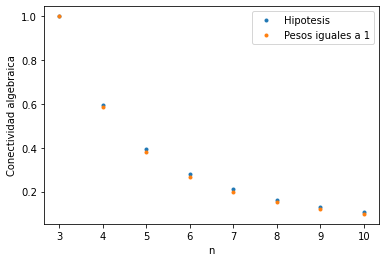

In [23]:
#En esta parte comparo los \lambda_2 para P_k
k=10
Y_1=[]
Y_2=[]
X=[]
for i in range (3,k+1):
    E1=camino_eig_hip(i)
    E2=camino_eig_1(i)
    Y_1.append(E1[1])
    Y_2.append(E2[1])
    X.append(i)

#Hago un gráfico
plot(X,Y_1,'.',X,Y_2,'.')
xlabel('n')
ylabel('Conectividad algebraica')
legend(['Hipotesis','Pesos iguales a 1'])
show()    


In [25]:
#Programa para calcular eigenvalores dados los pesos
def camino_eig_pes(n,A):
    m=n-1    
    C=[0]*(m+2)
    
    #Llena C con los valores de A
    for i in range(0,m):
        C[i+1]=A[i]

    #Hace una matriz de tamaño n por n
    L=hacerMatriz(n)
    
    # Llena la matriz laplaciana
    for i in range(n):
        for j in range (n):
            if j==i:
                L[i][j]=C[i+1]+C[i]
            if j==i+1:
                L[i][j]=-C[i+1]
            L[j][i]=L[i][j]
    
    #calcula los eigenvalores
    E=np.linalg.eigvals(L)
    #Los ordena
    E.sort()
    
    return E

In [28]:
R=[0.9,1.2,0.9]
S=camino_eig_pes(4,R)
print(S)

[1.27888373e-17 6.00000000e-01 1.80000000e+00 3.60000000e+00]


In [29]:
A=camino_eig_hip(4)
print(A)

[-3.35371091e-17  5.96419818e-01  1.90192379e+00  3.50165639e+00]


Con esto tengo un contraejemplo de mi hipótesis. Por lo tanto, es incorrecta :(